In [8]:
%load_ext autoreload
%autoreload 2

import numpy as np
import random
from scipy.stats import norm
from utilities import *
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
# init parameters
m = 2000
d = 2000
s = d/100
beta = 2
iterations = 100*d

/home/stefano/Documents/EPFL/MC/MC-project/utilities.py:29: RuntimeWarning: overflow encountered in exp
  comp = np.exp(-beta * (mse(X, y, theta1) - mse(X, y, theta)))


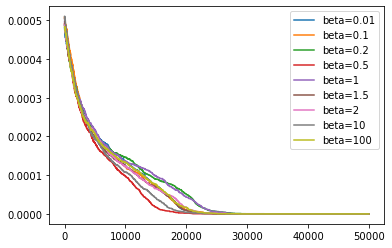

In [3]:
# for different values of beta computes the losses of the samples as we moove through the chain

iterations = 50000
plt.plot(get_sampling_losses_fixed_ones(iterations, 0.01, m, d), label = 'beta=0.01')
plt.plot(get_sampling_losses_fixed_ones(iterations, 0.1, m, d), label = 'beta=0.1')
plt.plot(get_sampling_losses_fixed_ones(iterations, 0.2, m, d), label = 'beta=0.2')
plt.plot(get_sampling_losses_fixed_ones(iterations, 0.5, m, d), label = 'beta=0.5')
plt.plot(get_sampling_losses_fixed_ones(iterations, 1, m, d), label = 'beta=1')
plt.plot(get_sampling_losses_fixed_ones(iterations, 1.5, m, d), label = 'beta=1.5')
plt.plot(get_sampling_losses_fixed_ones(iterations, 2, m, d), label = 'beta=2')
plt.plot(get_sampling_losses_fixed_ones(iterations, 10, m, d), label = 'beta=10')
plt.plot(get_sampling_losses_fixed_ones(iterations, 100, m, d), label = 'beta=100')

plt.legend()
plt.show()

/home/stefano/Documents/EPFL/MC/MC-project/utilities.py:52: RuntimeWarning: overflow encountered in exp
  acceptance = min(1, comp)
/home/stefano/Documents/EPFL/MC/MC-project/utilities.py:52: RuntimeWarning: overflow encountered in double_scalars
  acceptance = min(1, comp)


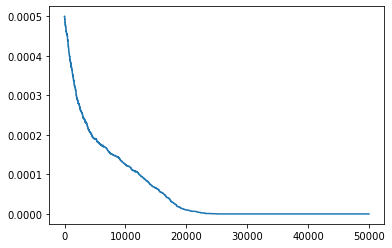

In [9]:
# test simulation annealing
plt.plot(get_sampling_losses_fixed_ones(iterations, 0.1, m, d, simulation_annealing=True))

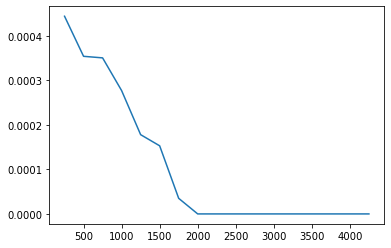

In [11]:
# increase the number of samples (m) to find minimum number of samples to 
losses_with_different_m = []
m_values = np.arange(250,4500, 250)

for m_value in  m_values: 
    # for the different values of m only save the last loss (after doing all the iterations)
    print(f'running MC for m={m_value}', end='\r')
    losses_with_different_m.append(get_sampling_losses_fixed_ones(iterations, 0.5, m_value, d)[-1])

plt.plot(m_values, losses_with_different_m) # always changes


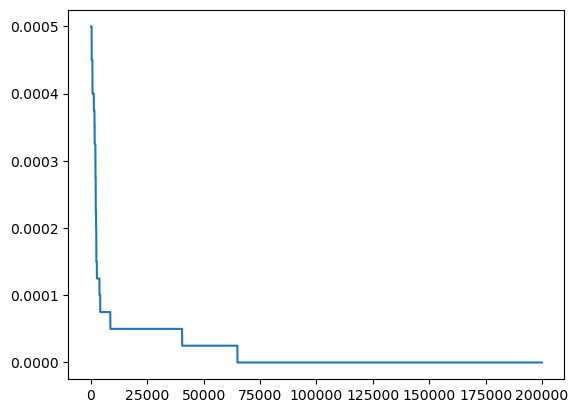

In [115]:
plt.plot(get_sampling_losses_fixed_ones(iterations, 0.5, m, d, s))

/var/folders/pw/_lszqphd0sj2lsl8tyw057lc0000gn/T/ipykernel_63723/2157463240.py:33: RuntimeWarning: overflow encountered in exp
  comp = np.exp(-beta * (mse(X, y, theta1) - mse(X, y, theta)))


ValueError: x and y must have same first dimension, but have shapes (9,) and (0,)

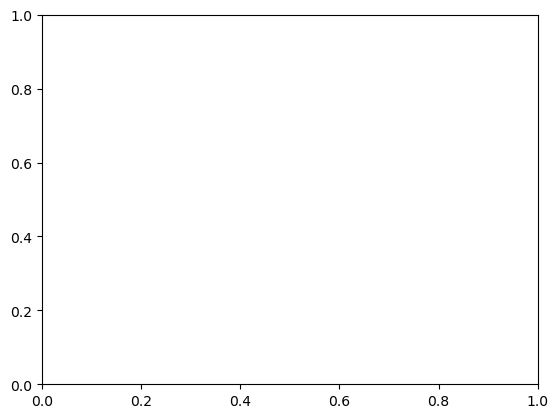

In [117]:
losses_with_different_m = []
m_values = np.arange(500,5000, 500)
for m_value in  m_values: 
    losses_with_different_m.append(get_sampling_losses_fixed_ones(iterations, 0.5, m_value, d, s)[-1])
plt.plot(m_values / d, losses_with_different_m) 

In [165]:
def generate_data(m, d, s): 
    X = np.random.normal(0, 1, (m, d))
    theta_true = [0] * int(d - s) + [1] * int(s)
    random.shuffle(theta_true)
    theta_true = np.array(theta_true)
    y = np.sign(X @ theta_true + np.random.normal(0, 1, m))

    return X, y, theta_true

def log_likelihood(X, y, theta): 
    
    min_one_indices = np.where(y == -1)[0]
    ones_indices = np.where(y == 1)[0]
    
    alpha = norm.cdf((X @ theta) / 1.)
    
    return -(np.log(alpha[ones_indices]).sum() + np.log(1 - alpha[min_one_indices]).sum())



def compute_losses_s(iterations, beta, m, d, s):

    X, y, theta_true = generate_data(m, d, s)
    losses = []
    real_loss = []
    
    theta = [0] * int(d - s) + [1] * int(s)
    random.shuffle(theta) # initialize theta randomly with 0 and 1s
    theta = np.array(theta)


    for _ in range(iterations): 
        
        theta1 = theta.copy()
        
        zeros_indices = np.where(theta == 0)[0]
        ones_indices = np.where(theta == 1)[0]
        pos_zero = np.random.choice(zeros_indices)
        pos_one = np.random.choice(ones_indices)
        
        theta1[pos_zero] = 1
        theta1[pos_one] = 0

        comp = np.exp(-beta * (log_likelihood(X, y, theta1) - log_likelihood(X, y, theta)))
        acceptance = min(1, comp)

        # change state with acceptance probability
        if np.random.rand(1)[0] < acceptance : 
            theta = theta1

        # compute loss
        real_loss.append( log_likelihood(X, y, theta1))
        mse_val = ((theta-theta_true)**2).mean()*(1/(2*s))
        losses.append(mse_val)

    return losses, real_loss


/var/folders/pw/_lszqphd0sj2lsl8tyw057lc0000gn/T/ipykernel_63723/500220195.py:17: RuntimeWarning: divide by zero encountered in log
  return -(np.log(alpha[ones_indices]).sum() + np.log(1 - alpha[min_one_indices]).sum())
/var/folders/pw/_lszqphd0sj2lsl8tyw057lc0000gn/T/ipykernel_63723/500220195.py:44: RuntimeWarning: invalid value encountered in scalar subtract
  comp = np.exp(-beta * (log_likelihood(X, y, theta1) - log_likelihood(X, y, theta)))


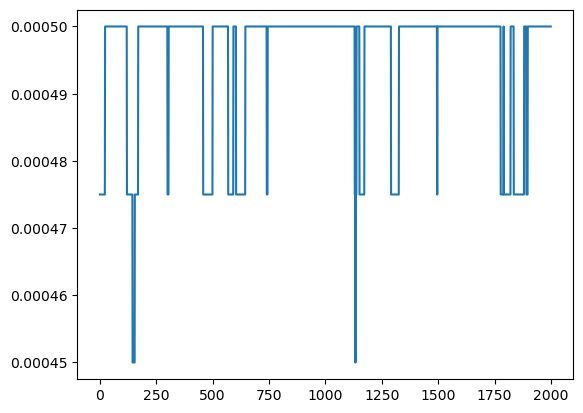

In [166]:
loss, real_loss = compute_losses_s(2000, 0.1, m, d, s)
plt.plot(loss)

In [174]:
X, y, theta_true = generate_data(m, d, s)
losses = []
real_loss = []


s = 5
theta = [0] * int(d - s) + [1] * int(s)
random.shuffle(theta) # initialize theta randomly with 0 and 1s
theta = np.array(theta)

log_likelihood(X, y, theta)

4371.254929742236

In [171]:
s

20.0